This notebook mainly deals with county-level data.

In [26]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 100


In [3]:
total_data = pd.read_csv("C:/Users/Ivy Jiang/Documents/GitHub/ORIE4741_Inpatient_Charges_Project/clean_data_v3.csv")

C:\Users\Ivy Jiang\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
#convert '120 +' of Length of Stay to 120, as there is no data as 120. But we need to be clear that 
#120 in our final data could actually mean 120+ days. Then convert Length of Stay to numeric

total_data.loc[total_data['Length of Stay']=='120 +','Length of Stay']=120 
total_data['Length of Stay'] = pd.to_numeric(total_data['Length of Stay'])

In [12]:
total_data.head(20)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Age Group Indicator,Admission Type Indicator,Patient Disposition Indicator
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,5511.95,$5582.49,2,3,18
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,3829.15,$4056.52,2,2,18
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,0 to 17,147,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,182357.0,NaN,NaN,0,N,Y,1108.20,$1644.75,0,2,18
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Moderate,Medical,Medicare,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,3418.18,$3370.87,4,3,18
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,0 to 17,147,F,White,Not Span/Hispanic,1,Elective,Home or Self Care,2012,142,Appendicitis and other appendiceal conditions,0,NO PROC,0,Other digestive system diagnoses,6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Medical,Medicaid,NaN,NaN,182357.0,NaN,NaN,0,N,Y,1386.10,$1919.46,0,3,18
5,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,18 to 29,147,M,White,Not Span/Hispanic,3,Elective,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Medical,Medicaid,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,3373.10,$3597.63,1,3,18
6,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,1,Elective,Home or Self Care,2012,154,Noninfectious gastroenteritis,202,ELECTROCARDIOGRAM,0,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,2,Moderate,Moderate,Medical,Medicare,NaN,NaN,90301264.0,167816.0,NaN,0,N,Y,1190.75,$1632.70,4,3,18
7,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,0 to 17,147,M,White,Not Span/Hispanic,1,Elective,Home or Self Care,2012,125,Acute bronchitis,0,NO PROC,0,Bronchiolitis & RSV pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicaid,NaN,NaN,182357.0,NaN,NaN,0,N,N,528.04,$596.04,0,3,18
8,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2012,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respira

In [11]:
#count how many counties in total
total_data["Hospital County"].nunique() #57 counties

57

In [10]:
#show how many patients admitted within each county
total_data.groupby("Hospital County").size().sort_values(ascending=False)

Hospital County
Manhattan      327397
Kings          229173
Queens         168911
Nassau         160136
Bronx          145764
Suffolk        133569
Erie           102841
Westchester     94022
Monroe          88148
Onondaga        65095
Albany          49091
Richmond        48444
Orange          31917
Rockland        28967
Oneida          27445
Dutchess        25900
Broome          24709
Schenectady     17782
Niagara         16832
Chemung         13682
Warren          12881
Rensselaer      11245
Otsego          11017
Chautauqua      10731
Jefferson       10162
Ulster           9996
Ontario          9943
St Lawrence      9301
Clinton          8484
Saratoga         7604
Steuben          7224
Putnam           5901
Tompkins         5722
Columbia         5450
Montgomery       5167
Oswego           5166
Cattaraugus      4952
Cayuga           4804
Franklin         4771
Sullivan         4501
Madison          4345
Genesee          4073
Cortland         3976
Wayne            3549
Fulton          

In [41]:
#get average charges for each county
total_data.groupby("Hospital County")["Total Charges"].mean().sort_values(ascending=False)

Hospital County
Nassau         48212.544430
Manhattan      47795.688835
Suffolk        41618.218788
Westchester    41391.228211
Albany         38828.047279
Rockland       37044.071684
Putnam         36717.613138
Bronx          36349.428608
Dutchess       35600.869127
Orange         35418.812455
Richmond       33263.343635
Queens         30041.280601
Kings          27517.269722
Onondaga       27262.165772
Ulster         26363.940485
Clinton        25655.837527
Erie           25353.207777
Schenectady    24748.565984
Saratoga       23959.779846
Broome         21723.906446
Monroe         20960.328444
Oneida         19868.889719
Rensselaer     19311.256893
Fulton         18708.786821
Sullivan       18615.475783
Chemung        18372.873918
Warren         18006.866221
Otsego         17258.078048
Chenango       16438.124482
Madison        16059.606663
Columbia       15619.074782
Wayne          14825.355379
Cayuga         14755.513612
Montgomery     13863.190915
Franklin       13804.717133
Jeff

In [95]:
#how charges vary between counties
total_data.groupby("Hospital County")["Total Charges"].mean().std()  #11345.16043834654  std of mean charges among counties

11345.16043834654

In [133]:
#count how many hospitals in total in NY state
total_data['Facility ID'].nunique()  #218

218

In [118]:
# Below two cells check whether each Facility ID corresponds to only one Facility Name
sum(total_data.groupby('Facility ID')['Facility Name'].nunique())

218

In [116]:
# One Facility Name is actually not a hospital name, therefore use Facility ID to count distinct number of hospitals. 
total_data.groupby('Facility Name')['Facility ID'].nunique()

Facility Name
Abortion Record - Facility Name Redacted                                  0
Adirondack Medical Center-Saranac Lake Site                               1
Albany Medical Center - South Clinical Campus                             1
Albany Medical Center Hospital                                            1
Albany Memorial Hospital                                                  1
Alice Hyde Medical Center                                                 1
Arnot Ogden Medical Center                                                1
Auburn Memorial Hospital                                                  1
Aurelia Osborn Fox Memorial Hospital                                      1
Bellevue Hospital Center                                                  1
Bertrand Chaffee Hospital                                                 1
Blythedale Childrens Hospital                                             1
Bon Secours Community Hospital                                            

In [37]:
#create a dataframe to store all county-level data
#add mean charges
county_data = pd.DataFrame(total_data.groupby("Hospital County")["Total Charges"].mean().sort_values(ascending=False))
county_patient = pd.DataFrame(total_data.groupby("Hospital County").size()).reset_index()
#add number of patients
county_data = pd.merge(county_data,county_patient,left_index=True,right_on='Hospital County')
county_data.rename(columns={0:'Num_of_patients'},inplace=True)
county_data.rename(columns={'Total Charges':'Avg Charges'},inplace=True)
county_data.set_index("Hospital County",inplace=True)

county_data.head()

,Avg Charges,Num_of_patients
Hospital County,,
Nassau,48212.544430,160136
Manhattan,47795.688835,327397
Suffolk,41618.218788,133569
Westchester,41391.228211,94022
Albany,38828.047279,49091


In [25]:
#add number of hospitals (count unique number of hospitals within each county)
county_hospital = pd.DataFrame(total_data.groupby("Hospital County")["Facility ID"].nunique()).reset_index()
county_data = pd.merge(county_data,county_hospital,left_index=True,right_on='Hospital County')
county_data.rename(columns={'Facility ID':'Num_of_hospitals'},inplace=True)

In [148]:
#add number of male and female patients; some counties include U as one type of Gender
g = total_data.loc[total_data['Hospital County']=='Cayuga','Gender'].reset_index()
g.groupby('Gender').size()

Gender
F    2895
M    1900
U       9
dtype: int64

In [ ]:
total_data.groupby('Gender').size() # 56 for U, consider to discard these

In [156]:
total_data.groupby('Race').size()

Race
Black/African American     358743
Other Race                 472523
Unknown                      7072
White                     1152488
dtype: int64

In [29]:
# get more statistics of other fields at county-level
county_more = pd.DataFrame(total_data.groupby('Hospital County').apply(lambda x: pd.Series(dict(
    sum_female=(x.Gender == 'F').sum(),
    sum_male=(x.Gender == 'M').sum(),
    sum_white=(x.Race == 'White').sum(),
    sum_black=(x.Race == 'Black/African American').sum(),
    sum_other=(x.Race == 'Other Race').sum(),
    sum_unknown=(x.Race == 'Unknown').sum(),
    avg_days=x['Length of Stay'].mean()
))))

In [30]:
#merge county detailed data with previously created ones
county_data = pd.merge(county_data,county_more,right_index=True,left_on='Hospital County')

In [35]:
county_data.head()

,Total Charges,Num_of_patients,Hospital County,Num_of_hospitals,avg_days,sum_black,sum_female,sum_male,sum_other,sum_unknown,sum_white
28,48212.544430,160136,Nassau,12,5.523805,24186.0,91334.0,68802.0,15369.0,30.0,120551.0
25,47795.688835,327397,Manhattan,20,5.448248,59010.0,183985.0,143407.0,148059.0,2.0,120326.0
48,41618.218788,133569,Suffolk,11,5.124318,10337.0,76685.0,56884.0,19258.0,129.0,103845.0
54,41391.228211,94022,Westchester,15,6.548031,17250.0,54313.0,39702.0,20466.0,881.0,55425.0
0,38828.047279,49091,Albany,4,5.482716,5569.0,27618.0,21473.0,3960.0,1.0,39561.0


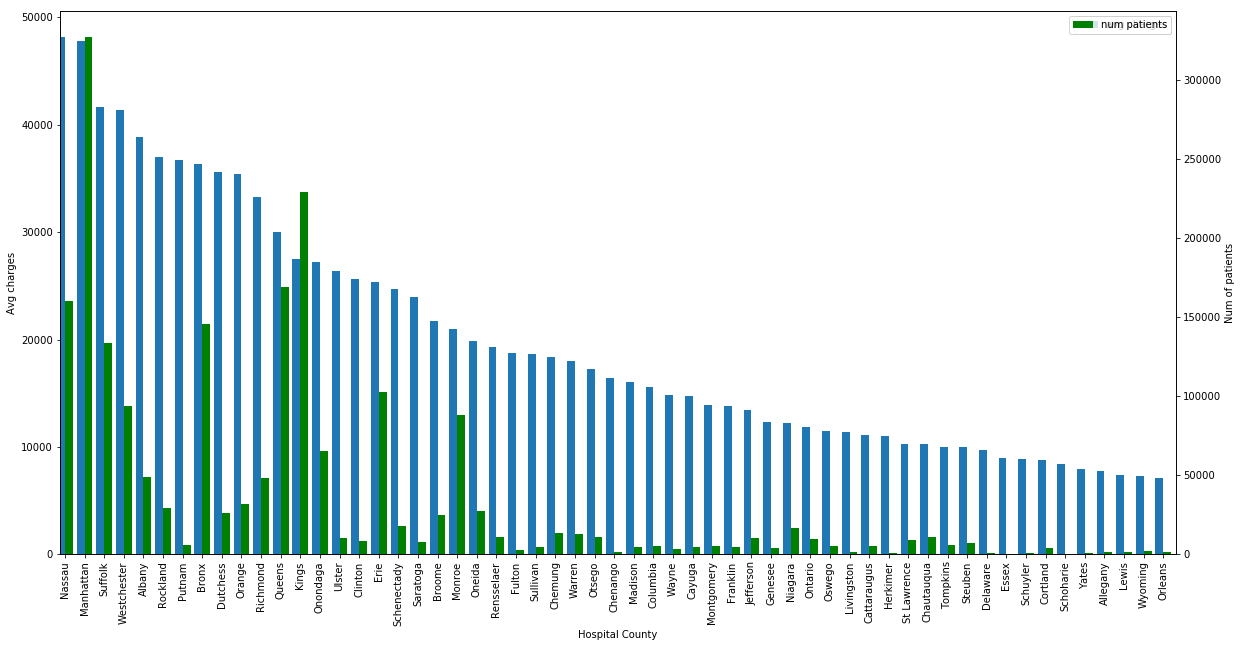

In [50]:
#plot number of patients and average charge in same plot for each county
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
width = 0.4
county_data['Avg Charges'].plot(kind='bar',ax=ax,position=1,width=width,label='avg charges',legend=True)
county_data['Num_of_patients'].plot(kind='bar',ax=ax2,color='g',position=0,width=width,label='num patients',legend=True)
ax.set_ylabel('Avg charges')
ax2.set_ylabel('Num of patients')
plt.legend()

The plot shows how average charges and the number of patients vary between couties. Some couties have small number of patients but very high avg treatment charges. The avg charges does not imply how densely the county is populated.

In [14]:
total_data.sort_values("Total Charges",ascending=False)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Age Group Indicator,Admission Type Indicator,Patient Disposition Indicator
1532863,New York City,Queens,7003004.0,1630.0,Long Island Jewish Medical Center,70 or Older,114,F,White,Not Span/Hispanic,120 +,Urgent,Expired,2012,85,Coma; stupor; and brain damage,61,OT OR PRCS VES NOT HEAD,0,Extracranial vascular procedures,1,Diseases and Disorders of the Nervous System,4,Extreme,Extreme,Surgical,Medicare,Private Health Insurance,Medicaid,190504.0,190504.0,NaN,0,N,N,7066435.82,$1740747.95,4,2,15
868988,New York City,Bronx,7000014.0,1176.0,SBH Health System,50 to 69,104,M,Other Race,Unknown,120 +,Emergency,Skilled Nursing Home,2012,129,Aspiration pneumonitis; food/vomitus,34,TRACHEOSTOMY; TEMP/PERM,0,Tracheostomy w MV 96+ hours w/o extensive proc...,4,Diseases and Disorders of the Respiratory System,4,Extreme,Extreme,Surgical,Medicaid,Medicaid,NaN,30001566.0,218268.0,NaN,0,N,Y,6230015.35,$1432332.20,3,1,16
898871,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,104,F,Black/African American,Spanish/Hispanic,120 +,Emergency,Expired,2012,2,Septicemia (except in labor),160,OT THER PRCS ON MUSCLES,0,Infectious & parasitic diseases including HIV ...,18,"Infectious and Parasitic Diseases, Systemic or...",4,Extreme,Extreme,Surgical,Medicare,Medicare,Medicaid,230548.0,90267302.0,NaN,0,N,Y,5166410.85,$1301790.88,3,1,15
759843,Hudson Valley,Westchester,5957001.0,1139.0,Westchester Medical Center,0 to 17,105,F,Black/African American,Not Span/Hispanic,120 +,Newborn,Home or Self Care,2012,218,Liveborn,94,OT OR UP GI THER PRCS,0,Neonate bwt <1500g w major procedure,15,Newborns and Other Neonates with Conditions Or...,4,Extreme,Major,Surgical,Medicaid,NaN,NaN,225261.0,262191.0,NaN,5900,N,N,4971830.83,$791116.85,0,4,18
1391871,New York City,Manhattan,7002054.0,1464.0,New York Presbyterian Hospital - Columbia Pres...,0 to 17,112,M,White,Spanish/Hispanic,120 +,Newborn,Expired,2012,218,Liveborn,78,COLORECTAL RESECTION,0,Neonate bwt <1500g w major procedure,15,Newborns and Other Neonates with Conditions Or...,4,Extreme,Major,Surgical,Private Health Insurance,Medicaid,Self-Pay,143358.0,207418.0,NaN,3700,N,N,4953934.39,$1199247.96,0,4,15
1369810,New York City,Manhattan,7002053.0,1463.0,NYU Hospitals Center,30 to 49,100,F,Other Race,Not Span/Hispanic,120 +,Emergency,Inpatient Rehabilitation Facility,2012,77,Encephalitis (except that caused by tuberculos...,34,TRACHEOSTOMY; TEMP/PERM,0,Tracheostomy w MV 96+ hours w extensive proced...,1,Diseases and Disorders of the Nervous System,4,Extreme,Extreme,Surgical,Private Health Insurance,NaN,NaN,222398.0,10048346.0,NaN,0,N,Y,4362477.42,$534252.43,2,1,14
1392036,New York City,Manhattan,7002054.0,1464.0,New York Presbyterian Hospital - Columbia Pres...,0 to 17,OOS,M,Black/African American,Spanish/Hispanic,120 +,Urgent,Cancer Center or Children's Hospital,2012,108,Congestive heart failure; nonhypertensive,176,OT ORGAN TRANSPLANTATN,0,Heart &/or lung transplant,5,Diseases and Disorders of the Circulatory System,4,Extreme,Extreme,Surgical,Private Health Insurance,Self-Pay,NaN,225639.0,201405.0,NaN,0,N,N,4214537.16,$2043339.87,0,2,4
1391839,New York City,Manhattan,7002054.0,1464.0,New York Presbyterian Hospital - Columbia Pres...,50 to 69,113,M,Other R